This notebook generates pixel art using `StableDiffusionXLImg2ImgPipeline`, `nerijs/pixel-art-xl`, and `latent-consistency/lcm-lora-sdxl`.

In [1]:
from diffusers import StableDiffusionXLImg2ImgPipeline, LCMScheduler
import torch

pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
pipe.load_lora_weights("latent-consistency/lcm-lora-sdxl", adapter_name="lora")
pipe.load_lora_weights("nerijs/pixel-art-xl", adapter_name="pixel")
pipe.set_adapters(["lora", "pixel"], adapter_weights=[1.0, 1.0])
pipe.to(device="cuda", dtype=torch.float16)
print()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


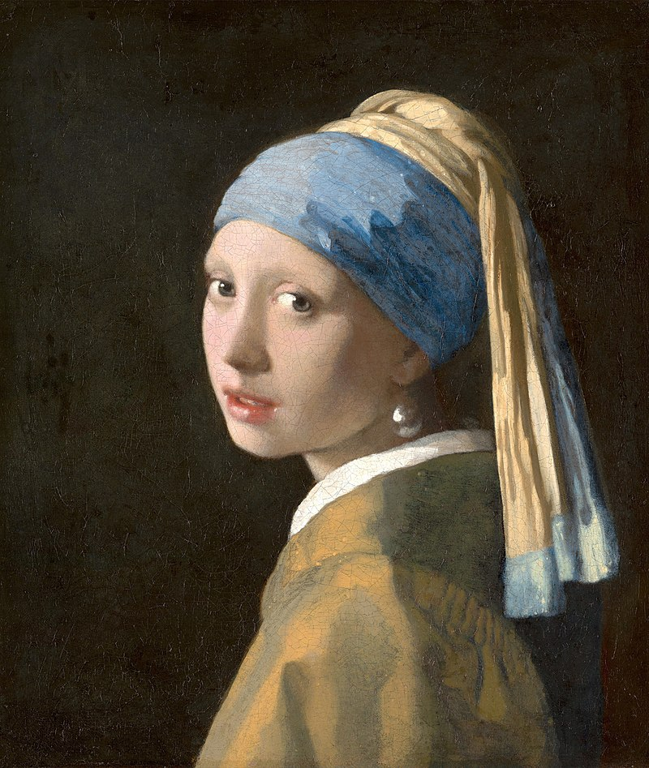

In [2]:
import requests
from PIL import Image
from io import BytesIO
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/1665_Girl_with_a_Pearl_Earring.jpg/800px-1665_Girl_with_a_Pearl_Earring.jpg"

response = requests.get(url)
input_image = Image.open(BytesIO(response.content)).convert("RGB")
input_image.thumbnail((768, 768))
input_image

  0%|          | 0/10 [00:00<?, ?it/s]

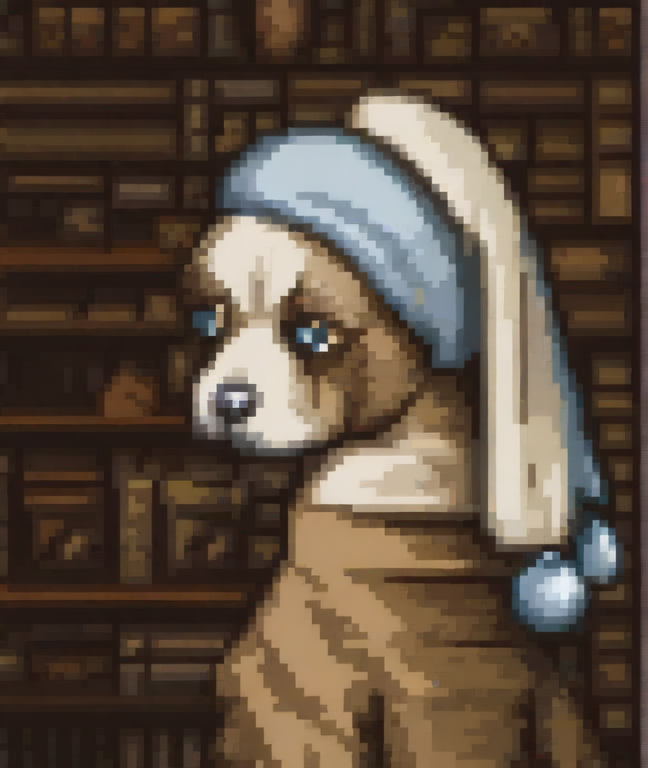

In [3]:
prompt = "a portrait of a dog wearing a pearl earring, pixel art"
#prompt = "a dog"
image = pipe(prompt, image=input_image, num_inference_steps=20, strength=0.5, guidance_scale=1.5).images[0]
image